# Stock Market data
### Data will be fetched from https://markets.financialcontent.com/ only
### Initially the data fetched is of Apple, Google, Microsoft

In [1]:
import pandas as pd
import numpy as np
import bs4 as bs
import urllib.request as ur
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

### Function to get the page-source of the company's url

In [2]:
def get_page_source(url):
    with ur.urlopen(url) as page_source:
        return page_source.read()

### Function to scrape the page and return the data as a list

In [3]:
def scraping(company):
    scrape_data = []
    page_url = "https://markets.financialcontent.com/stocks/quote/historical?Symbol=%s&Month=6&Year=2018&Range=12"
    source = get_page_source(page_url % company)
    soup = bs.BeautifulSoup(source, "lxml")
    table_data = soup.find("table", class_="quote_detailed_price_table data").find_all("tr")
    for row in table_data:
        r_data = row.find_all("td")
        scrape_data.append([data.text for data in r_data])
    return scrape_data

### Function to create the DataFrame with the scraped_data

In [4]:
def create_dframe(scrape_data):
    return pd.DataFrame(scrape_data, columns=["Date", "Open", "High", "Low", "Close", "Volume", "Change(%)"]).set_index("Date")

### Funtion to store the DataFrame as .csv file

In [5]:
def to_csv(frame, name):
    frame.to_csv(f"{name}_data.csv", encoding="utf-8")

### Function to remove the commas from Volume, change data type to float and remove all NaN values

In [6]:
def data_cleaning(company):
    company["Volume"] = company["Volume"].str.replace(",", "").astype(float)
    company.dropna(how="any", inplace=True)

In [7]:
company_code = ("AAPL", "GOOGL", "MSFT")

### Get the page-source, create DataFrame and store the data as .csv

In [8]:
for company in company_code:
    scrape_data = scraping(company)
    frame = create_dframe(scrape_data[1:])
    to_csv(frame, company)

### Get the from local storage to do further analysis

In [9]:
apple = pd.read_csv("AAPL_data.csv", index_col="Date", parse_dates=True)
google = pd.read_csv("GOOGL_data.csv", index_col="Date", parse_dates=True)
microsoft = pd.read_csv("MSFT_data.csv", index_col="Date", parse_dates=True)

In [10]:
companies = (apple, google, microsoft)

### Converting Volume to float and removing all NaN values

In [11]:
for i in range(len(companies)):
    data_cleaning(companies[i])
    to_csv(companies[i], company_code[i])

### DataFrame to store Opening stock of all companies

In [12]:
open_price = pd.DataFrame({"AAPL": apple["Open"],
                          "GOOGL": google["Open"],
                          "MSFT": microsoft["Open"]})

In [13]:
# Remove all rows with NaN value
open_price.dropna(how="any", inplace=True)

### Line graph for open_price

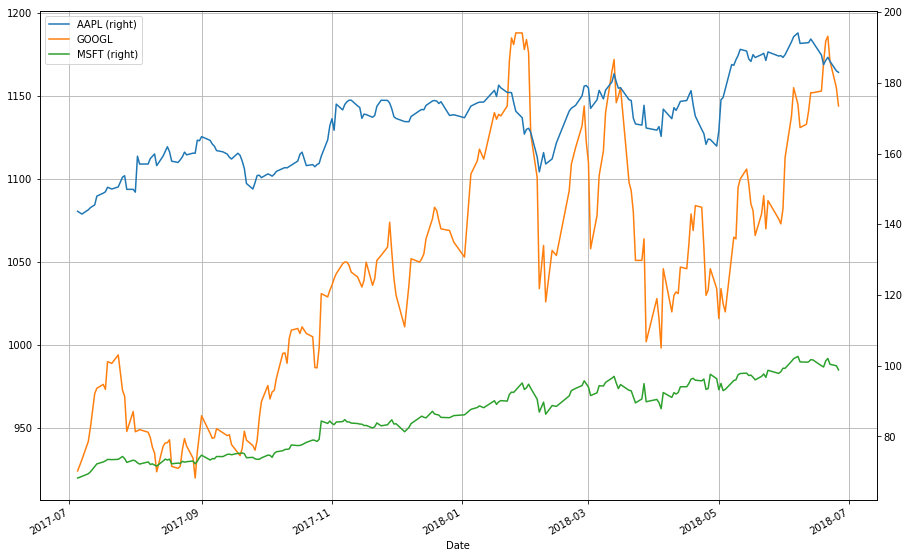

In [14]:
open_price.plot(secondary_y=["AAPL", "MSFT"], grid=True, figsize=(15, 10))
plt.show()

### DataFrame to store the differece b/w Opening and Closing price of all companies

In [15]:
close_open = pd.DataFrame({"AAPL": apple["Close"] - apple["Open"],
                          "GOOGL": google["Close"] - google["Open"],
                          "MSFT": microsoft["Close"] - microsoft["Open"]})

In [16]:
# Droping all the rows w/ NaN values
close_open.dropna(how="any", inplace=True)

### Line graph for close_open

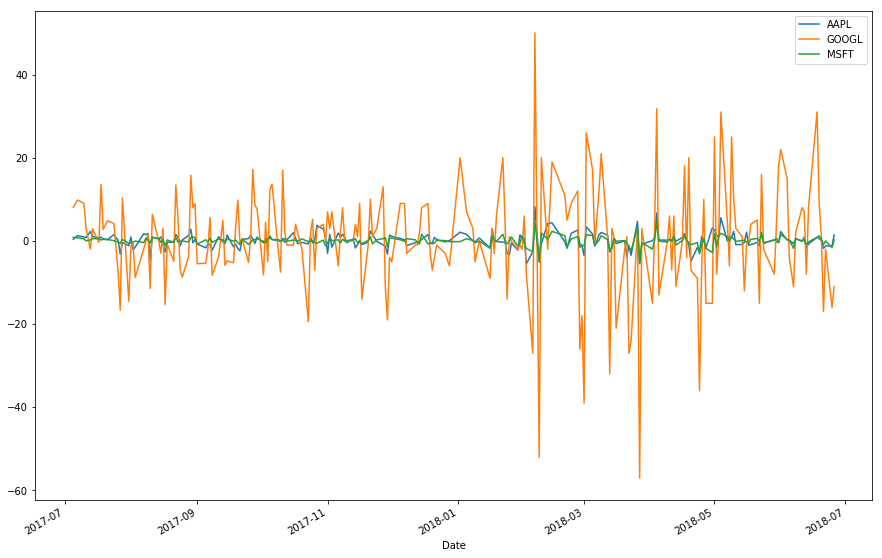

In [17]:
close_open.plot(figsize=(15, 10))
plt.show()

In [18]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
companies = ('AAPL_data.csv','GOOGL_data.csv','MSFT_data.csv')
company_name = ('Apple','Google','Microsoft')


                                         Prediction for Apple                                        


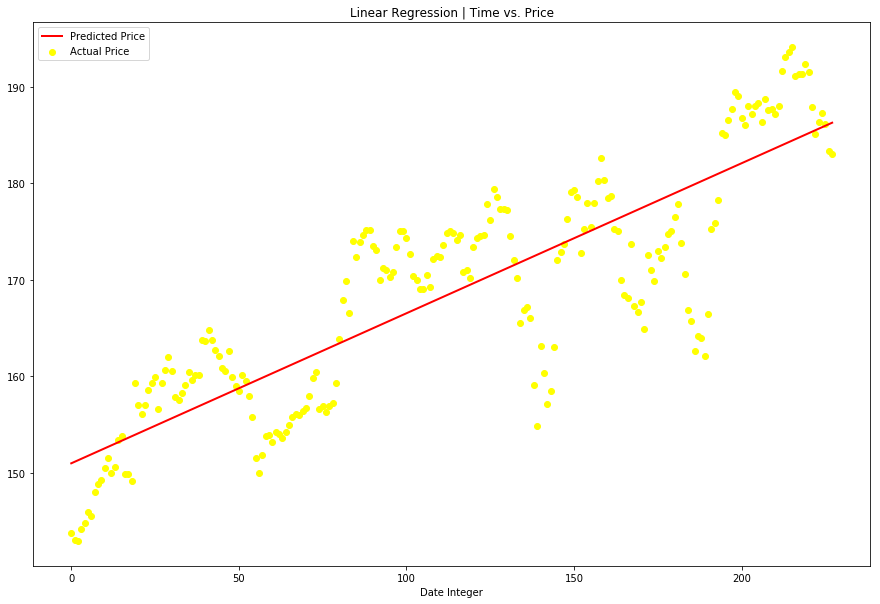

Predicted price : 186.59626630467247
Regression Coefficient : 0.15561246743621646
Regression Intercept : 150.9610112617789

                                        Prediction for Google                                        


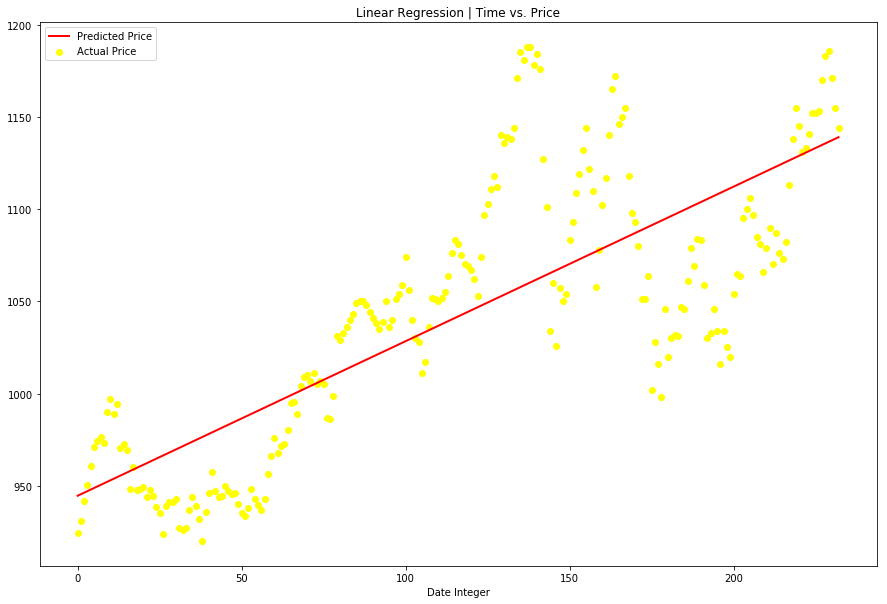

Predicted price : 1140.709659612254
Regression Coefficient : 0.838327660204233
Regression Intercept : 944.5409871244635

                                       Prediction for Microsoft                                      


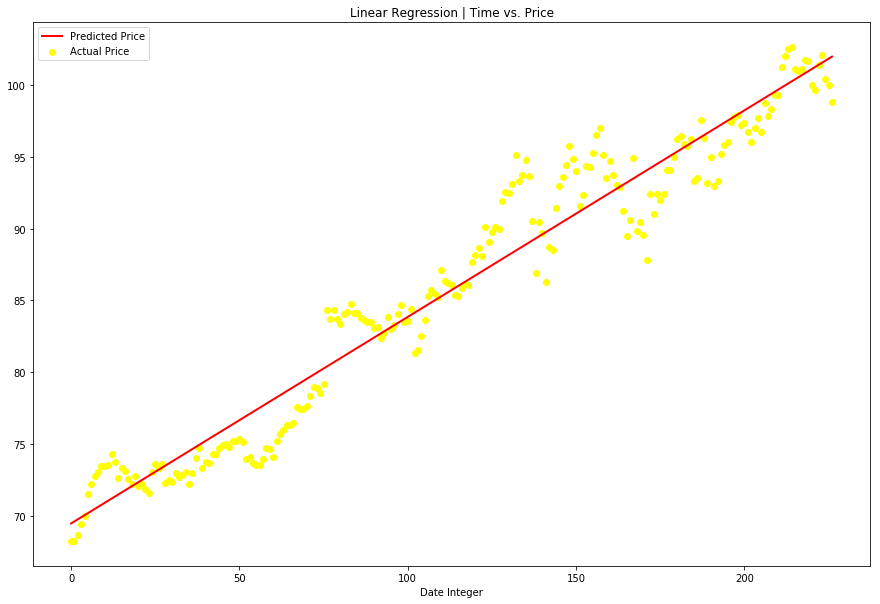

Predicted price : 102.26774944651793
Regression Coefficient : 0.14382835182377213
Regression Intercept : 69.47488523069788


In [21]:
for i in range(3):
    df = pd.read_csv(companies[i])
    prices = df['Open'].tolist()
    dates = list(reversed(range(len(prices))))

    #Convert to 1d Vector
    dates = np.reshape(dates, (len(dates), 1))
    prices = np.reshape(prices, (len(prices), 1))
    regressor = LinearRegression()
    regressor.fit(dates, prices)
    
    #Visualize Results
    print('\n\033[1m',("Prediction for "+company_name[i]).center(100))
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.scatter(dates, prices, color='yellow', label= 'Actual Price')    #plotting the initial datapoints
    plt.plot(dates, regressor.predict(dates), color='red', linewidth=2, label = 'Predicted Price')    #plotting the line made by linear regression
    plt.title('Linear Regression | Time vs. Price')
    plt.legend()
    plt.xlabel('Date Integer')
    plt.show()
 
    #Predict Price on Given Date
    date = len(dates)+1
    predicted_price =regressor.predict(date)
    print("Predicted price :", predicted_price[0][0])
    print("Regression Coefficient :", regressor.coef_[0][0])
    print("Regression Intercept :", regressor.intercept_[0])